In [1]:
%run 'Functions.ipynb'

In [2]:
client = Elasticsearch()

In [3]:
ids = [e.meta.id for e in Search(index='hep-recent').fields(['_id']).scan()]

In [4]:
len(ids)

99999

In [5]:
def term_vectors(ids, field):
    res = client.mtermvectors(
        index='hep-analysis', 
        doc_type='hep',
        ids=ids,
        fields=[field],
        field_statistics=False,
        term_statistics=True,
        offsets=False,
        payloads=False,
        positions=False
    )
    return [e['term_vectors'][field]['terms'] for e in res['docs'] if field in e['term_vectors']]

In [6]:
res = term_vectors(ids[0:100], 'abstracts.value')

In [38]:
word_freq = {}

In [39]:
for i in range(0, 500):
    vectors = term_vectors(ids[100 * i:100 * i + 100], 'abstracts.value')
    for vec in vectors:
        for word, freq in vec.items():
            if word not in word_freq:
                word_freq[word] = freq['ttf']

In [40]:
len(word_freq)

2099479

In [41]:
word_ordered = sorted(word_freq.items(), key=lambda x: -x[1])
word_ordered[:20]

[('model', 53570),
 ('use', 45261),
 ('result', 37965),
 ('show', 33273),
 ('present', 28955),
 ('study', 28790),
 ('energy', 27955),
 ('find', 27456),
 ('can', 27035),
 ('inline', 25917),
 ('mass', 25819),
 ('field', 25337),
 ('theory', 24478),
 ('data', 22741),
 ('two', 21410),
 ('also', 21275),
 ('large', 19463),
 ('obtain', 19364),
 ('system', 19122),
 ('inline formula', 19030)]

In [42]:
x, y = zip(*word_ordered)

In [73]:
def plot_interval(x, y, start=0, count=100):
    plt.xlim(start, start + count)
    plt.xticks(range(start, start + count), x[start:start + count], rotation=90)
    plt.plot(y)

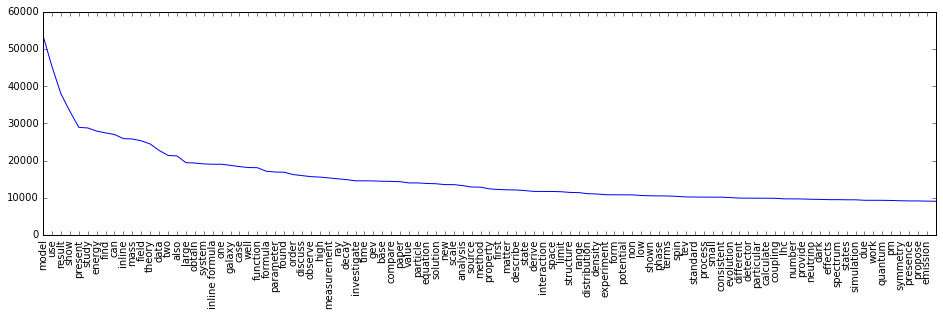

In [74]:
plot_interval(x, y)

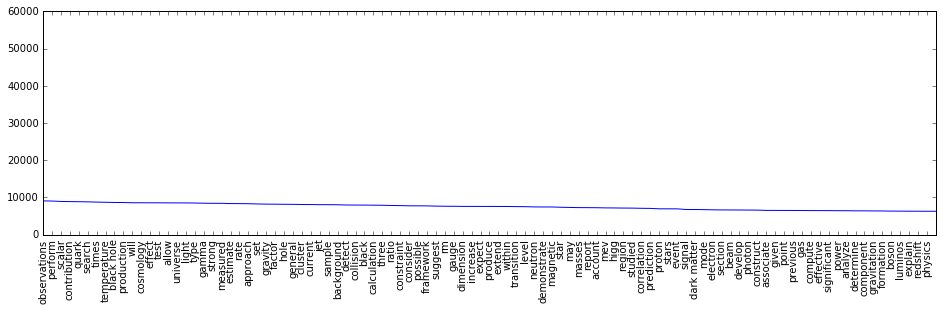

In [75]:
plot_interval(x, y, 100)

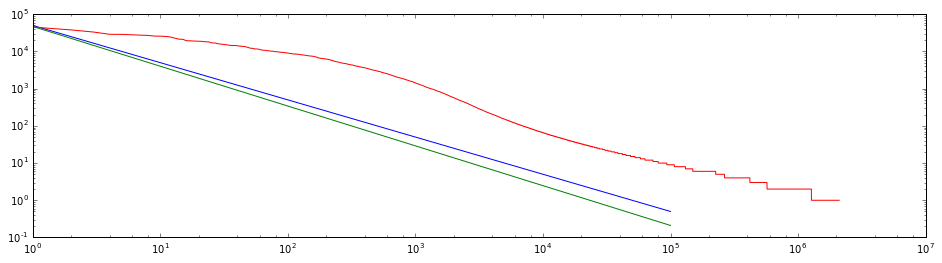

In [115]:
plt.xscale('log')
plt.yscale('log')
plt.plot(5e9 * sp.stats.zipf.pmf(range(100000), 1.00001))
plt.plot(7e5 * sp.stats.zipf.pmf(range(100000), 1.07))
plt.plot(y)

In [44]:
word_freq['higg']

7185

In [45]:
from wordcloud import WordCloud

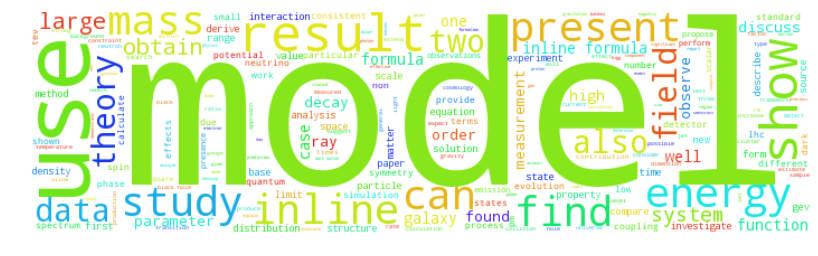

In [46]:
plt.axis("off")
plt.imshow(WordCloud(width=700, background_color='white').generate_from_frequencies(word_freq.items()))